# 3. Time Series

Time series are possibly the simplest matplotlib visualizations. Although time series are expressive and intuitive visualizations to follow, extracting meaning from them requires interpretation. Multiplex's time series make it easier to highlight the story you want to convey through the plot.

At its most basic, Multiplex's time series performs the exact same function as matplotlib's `plot`: the `TimeSeries` class passes on all arguments and keyword arguments to the `plot` function. This notebook follows a simple running example: Leicester City FC footballer Jamie Vardy's record-breaking goalscoring run in the 2015/2016 season of the English Premier League.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

First, we read the data from the data files. The Premier League season is split into 38 matches, or matchdays. The file contains data about three players: Leicester FC's Jamie Vardy, Tottenham Hotspur's Harry Kane, and Manchester City's Sergio Agüero. The data contains the cumulative number of goals over these matchdays for each player.

In [2]:
df = pd.read_csv('data/top_scorers.csv')
df.index = df['Matchday']
df.drop('Matchday', axis=1, inplace=True)
df.loc[0] = [0, 0, 0]
df.sort_index(inplace=True)
df

,Kane,Vardy,Aguero
Matchday,,,
0,0,0,0
1,0,1,0
2,0,1,1
3,0,1,1
4,0,2,1
5,0,3,1
6,0,4,1
7,1,6,1
8,1,7,6


Next, we plot the time series. Plotting it is very similar to how you would plot any other time series in matplotlib. The difference is that all calls are made on the `Drawable` through the `draw_time_series` method.

Multiple's time series offers more functionality. For example, it does not favor legends. Instead, line labels are drawn at the end of the time series. That way, you can read the plot as you read the data, rather than keep switching between reading the data and interpreting it with the legend.

Labels can be styled by passing on the `label_style` dictionary. Any parameter accepted by matplotlib's Text can also be passed. Multiplex uses color association to make it easier to read the time series—by default, the label will use the same color as the time series plot.

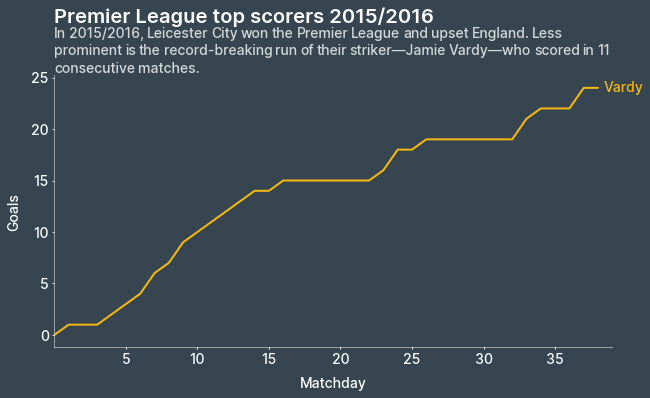

In [3]:
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "fire-dark.style"))

figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
viz.draw_time_series(df.index.to_list(), df.Vardy.to_list(),
                     color='#F6B913', linewidth=2,
                     label='Vardy', label_style={ 'fontweight': '500' })

viz.set_xlim(0, 39)
viz.set_xticks(range(5, 38, 5))
viz.set_xlabel('Matchday')
viz.set_ylabel('Goals')

viz.set_title('Premier League top scorers 2015/2016', loc='left')
viz.set_caption('In 2015/2016, Leicester City won the Premier League and upset England. Less prominent is the record-breaking run of their striker—Jamie Vardy—who scored in 11 consecutive matches.')
plt.show()

More time series can be added to the plot by calling the same function. Multiplex automatically distributes overlapping labels.

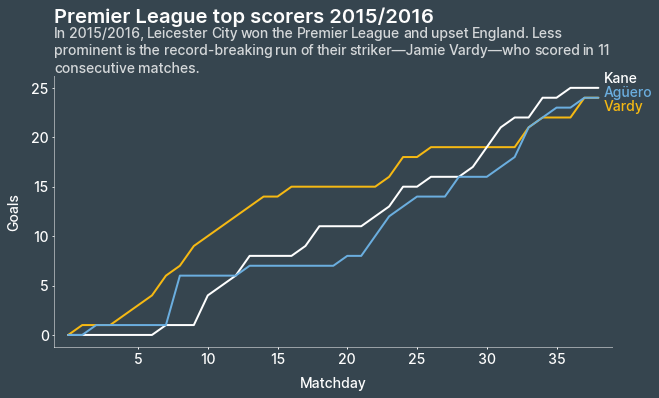

In [4]:
from multiplex import drawable
drawable = importlib.reload(drawable)

figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
viz.draw_time_series(df.index.to_list(), df.Vardy.to_list(),
                     color='#F6B913', linewidth=2,
                     label='Vardy', label_style={ 'fontweight': '500' })
viz.draw_time_series(df.index.to_list(), df.Kane.to_list(),
                     color='#FFFFFF', linewidth=2,
                     label='Kane', label_style={ 'fontweight': '500' })
viz.draw_time_series(df.index.to_list(), df.Aguero.to_list(),
                     color='#6BAEDF', linewidth=2,
                     label='Agüero', label_style={ 'fontweight': '500' })

viz.set_xlim(-1, 39)
viz.set_xticks(range(5, 38, 5))
viz.set_xlabel('Matchday')
viz.set_ylabel('Goals')

viz.set_title('Premier League top scorers 2015/2016', loc='left')
viz.set_caption('In 2015/2016, Leicester City won the Premier League and upset England. Less prominent is the record-breaking run of their striker—Jamie Vardy—who scored in 11 consecutive matches.')
plt.savefig('exports/overlapping-labels.png', dpi=300, bbox_inches='tight')

A time series on its own does not tell the entire story. At best, it invites readers to interpret it. How, then, do you tell a story with a time series? The caption is too detached from the time series.

Multiplex allows you to annotate certain points on the time series using the `annotations` argument. Annotations' markers can be styled using the `marker_style` parameter, and the text itself can be styled using the `annotation_style` parameter. More specifically, individual annotations can be styled by providing a dictionary instead of a string annotation. The annotation must have a `text` key and, optionally, `marker_style` and `annotation_style` keys to override the general styles.

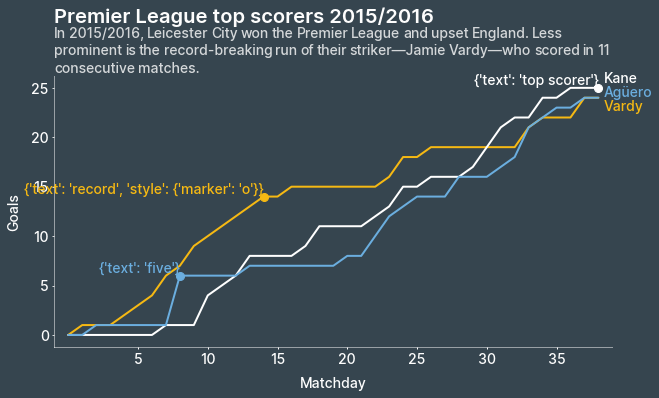

In [13]:
from multiplex import drawable
drawable = importlib.reload(drawable)

figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)

"""
Create the annotations.
"""
vardy_annotations = [ '' ] * len(df.index.to_list())
vardy_annotations[14] = { 'text': 'record', 'style': { 'marker': 'o' } }

aguero_annotations = [ None ] * len(df.index.to_list())
aguero_annotations[8] = 'five'

kane_annotations = [ None ] * len(df.index.to_list())
kane_annotations[-1] = 'top scorer'

"""
Draw the time series with the annotations
"""
viz.draw_time_series(df.index.to_list(), df.Vardy.to_list(),
                     color='#F6B913', linewidth=2,
                     label='Vardy', label_style={ 'fontweight': '500' },
                     annotations=vardy_annotations, marker_style={ 'marker': 'o' }
                    )
viz.draw_time_series(df.index.to_list(), df.Kane.to_list(),
                     color='#FFFFFF', linewidth=2,
                     label='Kane', label_style={ 'fontweight': '500' },
                     annotations=kane_annotations, marker_style={ 'marker': 'o' }
                    )
viz.draw_time_series(df.index.to_list(), df.Aguero.to_list(),
                     color='#6BAEDF', linewidth=2,
                     label='Agüero', label_style={ 'fontweight': '500' },
                     annotations=aguero_annotations, marker_style={ 'marker': 'o' }
                    )

viz.set_xlim(-1, 39)
viz.set_xticks(range(5, 38, 5))
viz.set_xlabel('Matchday')
viz.set_ylabel('Goals')

viz.set_title('Premier League top scorers 2015/2016', loc='left')
viz.set_caption('In 2015/2016, Leicester City won the Premier League and upset England. Less prominent is the record-breaking run of their striker—Jamie Vardy—who scored in 11 consecutive matches.')
plt.show()